In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
df= pd.read_csv('mymoviedb.csv',lineterminator='\n')   

In [81]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


###### Here is the dtype of the Release_Date is give us String but the actually its integers type

In [83]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [84]:
df.Genre.head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


- We have a dataFrame consisting of 9827 rows and 9 columns.
- In our dataset there is no NaNs nor duplicates values.
- Release_Date column needs to be casted into date time and to extract only the year.
- Overview, Original_language, and Poster_url would'nt be so useful during analysis, so we will drop them.
- Genre column has comma seperated values and white spaces that needs to be handled and casted into category

In [87]:
import datetime

In [88]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [89]:
print(df.Release_Date.dtypes)

datetime64[ns]


In [90]:
df['Release_Date']=df['Release_Date'].dt.year

In [91]:
df['Release_Date'].dtypes

dtype('int32')

#### Now we are dropping the columns which are not Necessary

In [92]:
df.drop(['Overview','Original_Language','Poster_Url'], axis=1,inplace=True)

In [93]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

##### we would cut the ***Vote_Average*** values and make 4 categories ['Popular','average','below_avg','not_popular'] to describe it more using categorize_col() function provided above

In [94]:
df['Vote_Average'].head(20)
print(df['Vote_Average'].unique()[:50])

[8.3 8.1 6.3 7.7 7.  6.6 6.8 5.3 7.2 5.9 7.3 7.1 5.1 4.6 6.  8.2 5.4 6.1
 8.4 6.9 5.8 7.4 7.8 8.  6.2 6.7 7.6 8.6 4.8 5.5 7.9 6.4 7.5 5.7 2.2 6.5
 0.  5.6 5.2 5.  8.5 3.5 4.  3.3 4.7 4.2 4.3 2.  4.1 4.9]


In [95]:
# Clean up the Vote_Average column
df['Vote_Average'] = (
    df['Vote_Average']
    .astype(str)               # ensure string for cleaning
    .str.strip()               # remove leading/trailing spaces
    .str.replace(r'\.$', '', regex=True)  # remove trailing dots like '7.'
)

# Convert to numeric
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

print(df['Vote_Average'].dtype)       # should now be float64
print(df['Vote_Average'].describe())  # should show min, max, etc.


float64
count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64


In [96]:
df['Vote_Average'].unique()

array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

In [97]:
def categorize_col(df, col, labels):
    # Convert column to numeric

    # Compute bin edges
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    
    # Remove duplicates to ensure strictly increasing bins
    edges = sorted(set(edges))
    
    # Adjust labels length if fewer bins than expected
    if len(edges) - 1 < len(labels):
        labels = labels[:len(edges)-1]
    
    # Apply binning
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df


In [98]:
labels = ['not_popular','below_avg','average','popular']
categorize_col(df, 'Vote_Average', labels)

print(df['Vote_Average'].unique())


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [99]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [100]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [101]:
df.dropna(inplace=True)

In [102]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

- we split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [103]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [104]:
df['Genre']= df['Genre'].astype('category')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [76]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

## QUE:-1, What is the most frequent Genre of movies released on Netflix ?

In [106]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

Text(0.5, 1.0, 'Genre column Distribution')

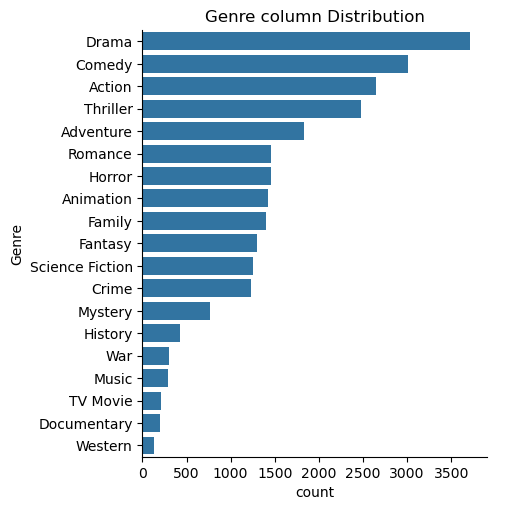

In [107]:
sns.catplot(y='Genre', data = df, kind = 'count',
            order= df['Genre'].value_counts().index)
plt.title('Genre column Distribution')

# which has the highest votes in vote avg column?

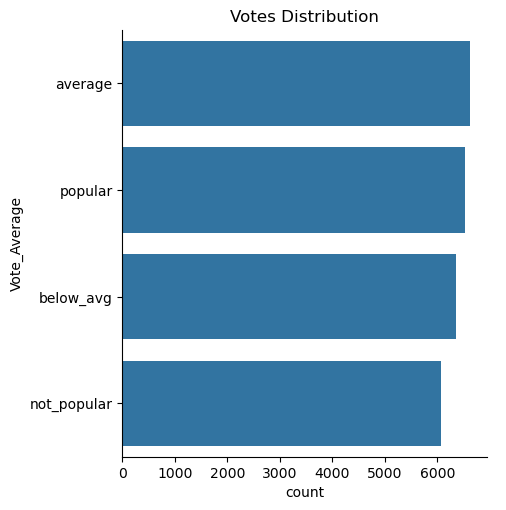

In [109]:
sns.catplot(y= 'Vote_Average', data = df, kind= 'count',
           order=df['Vote_Average'].value_counts().index)
plt.title('Votes Distribution')
plt.show()

# What movie got the highest popularity? what's it's genre

In [110]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the Lowest popularity? what's it's genre

In [111]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# which year has the most filmmed movies

<function matplotlib.pyplot.show(close=None, block=None)>

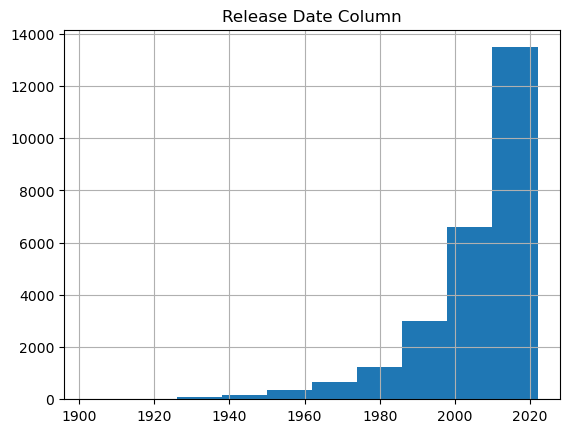

In [112]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show

Conclusion
- Q1:- What is the most frequent Genre in the dataset
- Ans: Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genre.
- Q2:- What genres has highest votes?
- Ans: we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies Popularity.
- Q3:- What movie got the highest Popularity.? what it's genre.?
- Ans: Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action , Adventure and Sience Fiction .
- Q4:- What movie got the lowest popularity ? what's its genre ?
- Ans: The united states, thread' has the highest lowest rate in our dataset and it has genres of music , drama , 'war', 'sci-fi' and history`
- Q5:- Which year has the most filmmed movies?
- Ans: Year 2020 has the highest filmming rate in our dataset.
